<a href="https://colab.research.google.com/github/KristinaFateyeva/simple_mnist/blob/main/MNIST_to_Git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_test.shape

(10000, 28, 28)

Image #6727:


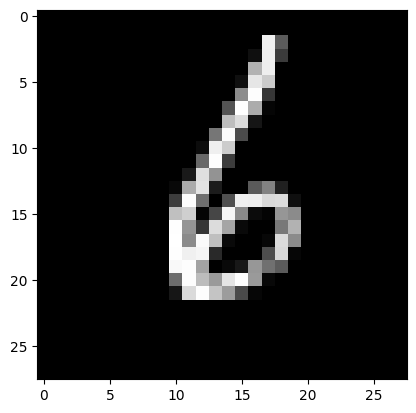


Associated number:


6

In [5]:
import random

n = np.random.randint(0, 10000)
plt.imshow(Image.fromarray(x_train[n]).convert('RGB'))
print(f'Image #{n}:')
plt.show()
print('\nAssociated number:')
y_train[n]

In [ ]:
xtr = x_train.reshape(60000, 784)
xtes = x_test.reshape(10000, 784)
print(xtr.shape)
print(xtes.shape)

(60000, 784)
(10000, 784)


In [ ]:
xtr = xtr.astype('float32')
xtes = xtes.astype('float32')
xtr = xtr / 255
xtes = xtes / 255

In [ ]:
ytr = utils.to_categorical(y_train, 10)
ytes = utils.to_categorical(y_test, 10)
print(ytes[n])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
model = Sequential()
model.add(Dense(800, input_dim=784, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(),loss='categorical_crossentropy', metrics='accuracy')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952410 (3.63 MB)
Trainable params: 952410 (3.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model.fit(xtr, ytr, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 7s 3ms/step - loss: 0.2078 - accuracy: 0.9378
Epoch 2/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0777 - accuracy: 0.9761
Epoch 3/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0482 - accuracy: 0.9844
Epoch 4/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0347 - accuracy: 0.9883
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0270 - accuracy: 0.9909
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0206 - accuracy: 0.9935
Epoch 7/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0189 - accuracy: 0.9938
Epoch 8/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0168 - accuracy: 0.9945
Epoch 9/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0113 - accuracy: 0.9964
Epoch 10/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0145 - accuracy: 0.9955

In [ ]:
model.save_weights('model_weights.h5')

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('model.h5')
model.load_weights('model_weights.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gdown
gdown.download('https://drive.google.com/uc?id=1mdAgcVm0yLyppx2-EOMipZqJBODLsgt5', None, quiet=True)

'test_nums.zip'

In [ ]:
!unzip -qo test_nums.zip

In [ ]:
from PIL import Image

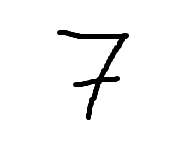

In [ ]:
img = Image.open('/content/7.png')
display(img)

In [ ]:
from PIL import Image, ImageChops
import numpy as np
from tensorflow.keras.models import load_model

def predict(img_path='./test_image_1.jpg', model_path='./model.h5'):
  classes = {0: 0,
             1: 1,
             2: 2,
             3: 3,
             4: 4,
             5: 5,
             6: 6,
             7: 7,
             8: 8,
             9: 9}

  model = load_model(model_path)

  img_width, img_height = 28, 28

  img = Image.open(img_path).convert('L').resize((img_width, img_height))
  img = ImageChops.invert(img)
  image = np.array(img, dtype='float64')

  image = image.reshape(784)
  image = np.expand_dims(image, axis=0)
  image_class = np.argmax(model.predict(image))

  print(image_class)

In [ ]:
predict(img_path='/content/1.png', model_path='model.h5')

1/1 [==============================] - 0s 48ms/step
1


In [ ]:
text_code = '''

from PIL import Image, ImageChops
import numpy as np
from tensorflow.keras.models import load_model

def predict(img_path='./test_image_1.jpg', model_path='./model.h5'):
  classes = {0: 0,
             1: 1,
             2: 2,
             3: 3,
             4: 4,
             5: 5,
             6: 6,
             7: 7,
             8: 8,
             9: 9}

  model = load_model(model_path)

  img_width, img_height = 28, 28

  img = Image.open(img_path).convert('L').resize((img_width, img_height))
  img = ImageChops.invert(img)
  image = np.array(img, dtype='float64')

  image = image.reshape(784)
  image = np.expand_dims(image, axis=0)
  image_class = np.argmax(model.predict(image))

  print(image_class)

  '''

with open('script.py', 'w') as f:
  f.write(text_code.strip())

In [ ]:
label_txt = '''

1
2
3
4
5
6
7
8
9

'''

with open('label.txt', 'w') as f:
  f.write(label_txt.strip())

In [ ]:
import os
from zipfile import ZipFile as Zip

list_of_files = ['model.h5', 'script.py', 'label.txt', *[f'{i}.png' for i in range(1,10)]]

my_zip = Zip('/content/archive.zip', 'w')

for file in list_of_files:
  if os.path.exists(file):
    my_zip.write(file)
  else:
    print(f'File {file} is absent')

my_zip.close()

In [ ]:
from google.colab import files

files.download('archive.zip')

print('Archive has been downloaded')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Archive has been downloaded
